In [457]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import requests
import os
from dotenv import load_dotenv
import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import json
import random
import Fun


In [290]:

def Mapa(lat, lon):
    origen = Map(location=[lat, lon], zoom_start=13)
#Option of setting the company    
    icon1 = Icon(
        color="lightred",
        prefix="fa",
        icon="gamepad",
        icon_color="white"
    )

    game = Marker(
        location=[lat, lon],
        tooltip="Game",
        icon=icon1
    )
    game.add_to(origen)

#Starbucks  
    url = f"https://api.foursquare.com/v3/places/search?query=Starbucks&near={lat}%2C{lon}&limit=1"

    headers = {
        "accept": "application/json",
        "Authorization": (token)
    }

    response = requests.get(url, headers=headers)
    coffe = response.json()["results"][0]
    loncoffe = coffe["geocodes"]["main"]["longitude"]
    latcoffe = coffe["geocodes"]["main"]["latitude"]
    
    icon2 = Icon(
        color="white",
        prefix="fa",
        icon="coffee",
        icon_color="green"
    )

    coffee = Marker(
        location=[latcoffe, loncoffe],
        tooltip="coffee",
        icon=icon2
    )
    coffee.add_to(origen)
#airports category:19031
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19031&limit=1"

    response = requests.get(url, headers=headers)
    air = response.json()["results"][0]
    lonair = air["geocodes"]["main"]["longitude"]
    latair = air["geocodes"]["main"]["latitude"]
    
    icon3 = Icon(
        color="lightblue",
        prefix="fa",
        icon="plane",
        icon_color="grey"
    )

    plane = Marker(
        location=[latair, lonair],
        tooltip="Airport",
        icon=icon3
    )
    plane.add_to(origen)
#Metros and buses
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19046%2C19042&limit=1"

    response = requests.get(url, headers=headers)
    metro = response.json()["results"][0]
    lonmetro = metro["geocodes"]["main"]["longitude"]
    latmetro = metro["geocodes"]["main"]["latitude"]
    
    icon4 = Icon(
        color="lightblue",
        prefix="fa",
        icon="bus",
        icon_color="grey"
    )

    metro = Marker(
        location=[latmetro, lonmetro],
        tooltip="Bus/Metro Station",
        icon=icon4
    )
    metro.add_to(origen)


#Rail and Tram
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19047%2C19050&limit=1"

    response = requests.get(url, headers=headers)
    rail = response.json()["results"][0]
    lonrail = rail["geocodes"]["main"]["longitude"]
    latrail = rail["geocodes"]["main"]["latitude"]
    
    icon5 = Icon(
        color="lightblue",
        prefix="fa",
        icon="train",
        icon_color="grey"
    )

    rail = Marker(
        location=[latrail, lonrail],
        tooltip="Train/Tram Station",
        icon=icon5
    )
    rail.add_to(origen)

#Schools category:12057
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=12057&limit=1"

    response = requests.get(url, headers=headers)
    school = response.json()["results"][0]
    lonschool = school["geocodes"]["main"]["longitude"]
    latschool = school["geocodes"]["main"]["latitude"]
    
    icon6 = Icon(
        color="orange",
        prefix="fa",
        icon="graduation-cap",
        icon_color="black"
    )

    school = Marker(
        location=[latschool, lonschool],
        tooltip="School",
        icon=icon6
    )
    school.add_to(origen)

#Kindergarten Schools category:12056
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=12056&limit=1"

    response = requests.get(url, headers=headers)
    kinder = response.json()["results"][0]
    lonkinder = kinder["geocodes"]["main"]["longitude"]
    latkinder = kinder["geocodes"]["main"]["latitude"]
    
    icon7 = Icon(
        color="orange",
        prefix="fa",
        icon="child",
        icon_color="black"
    )

    kinder = Marker(
        location=[latkinder, lonkinder],
        tooltip="KinderGarten",
        icon=icon7
    )
    kinder.add_to(origen)
#Vegan
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=13377&limit=1"

    response = requests.get(url, headers=headers)
    vegan = response.json()["results"][0]
    lonvegan = vegan["geocodes"]["main"]["longitude"]
    latvegan = vegan["geocodes"]["main"]["latitude"]
    
    icon8 = Icon(
        color="green",
        prefix="fa",
        icon="cutlery",
        icon_color="white"
    )

    vegan = Marker(
        location=[latvegan, lonvegan],
        tooltip="Vegan",
        icon=icon8
    )
    vegan.add_to(origen)


#Court
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=18006&limit=1"

    response = requests.get(url, headers=headers)
    basket = response.json()["results"][0]
    lonbasket = basket["geocodes"]["main"]["longitude"]
    latbasket = basket["geocodes"]["main"]["latitude"]
    
    icon9 = Icon(
        color="white",
        prefix="fa",
        icon="globe",
        icon_color="orange"
    )

    basket = Marker(
        location=[latbasket, lonbasket],
        tooltip="Stadium",
        icon=icon9
    )
    basket.add_to(origen)
    return origen

In [497]:
sfmap=Mapa(lat1,lon1)

In [496]:
nymap=Mapa(lat2,lon2)

In [495]:
lonmap=Mapa(lat3,lon3)

In [498]:
sfmap.save("Images/sf.html")
nymap.save("Images/ny.html")
lonmap.save("Images/lon.html")

In [222]:
load_dotenv()

True

In [223]:
token=os.getenv("token")

In [93]:
client = MongoClient("localhost:27017")
client.list_database_names()

['Ironhack', 'admin', 'companies', 'config', 'local']

In [94]:
db = client["Ironhack"]

In [95]:
c = db.get_collection("companies")

In [96]:
cities=list(c.find({"ipo.valuation_amount":{"$gte":1000000}},{"_id":0, "name":1, "ipo.valuation_amount":1, "offices.city":1}))

In [101]:
city_count = {}
for company in cities:
    for office in company['offices']:
        city = office['city']
        if city in city_count:
            city_count[city] += 1
        else:
            city_count[city] = 1

print(city_count)

{'Menlo Park': 1, 'Dublin': 1, 'New York': 7, 'San Francisco': 9, 'Mountain View': 1, 'Seattle': 4, 'Cambridge': 1, 'Tokyo': 3, 'London': 5, 'Hamburg': 1, 'Barcelona': 1, 'Prague': 1, 'Windsor, Victoria': 1, 'Stockholm': 1, 'Ciudad de Buenos Aires': 1, 'Maspero, Cairo': 1, 'Singapore': 2, 'Mississauga, Ontario': 1, 'Dubai': 1, 'Morrisville': 1, 'Palo Alto': 2, 'Frankfurt am Main': 1, 'Boulder': 2, 'Portland': 1, 'Or Yehuda': 1, 'Tel Aviv': 1, 'Redwood City': 1, 'Newton': 1, 'Austin': 2, 'San Diego': 1, 'Foster City': 1, 'San Antonio': 1, 'Houston': 1, 'New Haven': 1, 'Santa Clara': 3, 'Shenzhen': 1, 'San Mateo': 1, 'Beijing': 3, 'Fairfax': 1, 'Dexter': 1, 'Sunnyvale': 3, 'Kirkland': 2, 'Changning, Shanghai': 1, 'Sao Paulo': 1, 'Chelmsford, Essex': 1, 'Denver': 1, 'Raleigh': 1, 'Amsterdam': 1, 'Buckinghamshire': 1, 'Melbourne': 1, 'Helsinki': 1, 'Oakland': 1, 'Radnor': 1, 'Lund': 1, 'Clearwater': 2, 'Chicago': 1, '': 1, 'San Carlos': 1, 'Santa Monica': 1, 'Lake Forest': 1, 'Baltimore': 

In [102]:
sorted_cities = sorted(city_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_cities)

[('San Francisco', 9), ('New York', 7), ('London', 5), ('Seattle', 4), ('Tokyo', 3), ('Santa Clara', 3), ('Beijing', 3), ('Sunnyvale', 3), ('Singapore', 2), ('Palo Alto', 2), ('Boulder', 2), ('Austin', 2), ('Kirkland', 2), ('Clearwater', 2), ('Menlo Park', 1), ('Dublin', 1), ('Mountain View', 1), ('Cambridge', 1), ('Hamburg', 1), ('Barcelona', 1), ('Prague', 1), ('Windsor, Victoria', 1), ('Stockholm', 1), ('Ciudad de Buenos Aires', 1), ('Maspero, Cairo', 1), ('Mississauga, Ontario', 1), ('Dubai', 1), ('Morrisville', 1), ('Frankfurt am Main', 1), ('Portland', 1), ('Or Yehuda', 1), ('Tel Aviv', 1), ('Redwood City', 1), ('Newton', 1), ('San Diego', 1), ('Foster City', 1), ('San Antonio', 1), ('Houston', 1), ('New Haven', 1), ('Shenzhen', 1), ('San Mateo', 1), ('Fairfax', 1), ('Dexter', 1), ('Changning, Shanghai', 1), ('Sao Paulo', 1), ('Chelmsford, Essex', 1), ('Denver', 1), ('Raleigh', 1), ('Amsterdam', 1), ('Buckinghamshire', 1), ('Melbourne', 1), ('Helsinki', 1), ('Oakland', 1), ('Radn

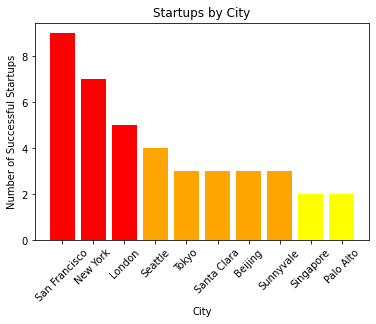

In [473]:
city_names = [city[0] for city in sorted_cities[:10]]
startup_counts = [city[1] for city in sorted_cities[:10]]

plt.bar(city_names, startup_counts, color=['red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange', 'yellow', 'yellow'])
plt.xlabel('City')
plt.ylabel('Number of Successful Startups')
plt.title('Startups by City')
plt.xticks(rotation=45)
plt.savefig("Images/Startups.png")
plt.show()

In [104]:
condition1= {"category_code":"games_video"}
condition2= {"offices.city":"San Francisco"}
projection = {"_id":0, "name":1, "deadpooled_year":1, "deadpooled_month":1, "offices.city":1}

list(c.find({"$and": [condition1, condition2]}, projection).sort("deadpooled_year",-1).limit(5))

[{'name': 'Ecast',
  'deadpooled_year': 2012,
  'deadpooled_month': 2,
  'offices': [{'city': 'San Francisco'}]},
 {'name': 'Shattered Reality Interactive',
  'deadpooled_year': 2012,
  'deadpooled_month': 7,
  'offices': [{'city': 'San Francisco'}]},
 {'name': 'Shattered Reality Interactive',
  'deadpooled_year': 2012,
  'deadpooled_month': 7,
  'offices': [{'city': 'San Francisco'}]},
 {'name': 'Lexy',
  'deadpooled_year': 2011,
  'deadpooled_month': 6,
  'offices': [{'city': 'San Francisco'}]},
 {'name': 'DanceJam',
  'deadpooled_year': 2011,
  'deadpooled_month': None,
  'offices': [{'city': 'San Francisco'}]}]

In [105]:
condition1= {"category_code":"games_video"}
condition2= {"offices.city":"New York"}
projection = {"_id":0, "name":1, "deadpooled_year":1, "deadpooled_month":1, "offices.city":1}

list(c.find({"$and": [condition1, condition2]}, projection).sort("deadpooled_year",-1).limit(5))

[{'name': 'GameGround',
  'deadpooled_year': 2012,
  'deadpooled_month': 10,
  'offices': [{'city': 'New York'}]},
 {'name': 'Robotgalaxy',
  'deadpooled_year': 2012,
  'deadpooled_month': 12,
  'offices': [{'city': 'New York'}]},
 {'name': 'For Your Imagination',
  'deadpooled_year': 2010,
  'deadpooled_month': 2,
  'offices': [{'city': 'New York'}]},
 {'name': 'SpiralFrog',
  'deadpooled_year': 2009,
  'deadpooled_month': 3,
  'offices': [{'city': 'New York'}]},
 {'name': 'WeShow',
  'deadpooled_year': 2008,
  'deadpooled_month': 12,
  'offices': [{'city': 'New York'}]}]

In [387]:
condition1= {"category_code":"games_video"}
condition2= {"offices.city":"London"}
projection = {"_id":0, "name":1, "deadpooled_year":1,"deadpooled_month":1, "offices.city":1}

list(c.find({"$and": [condition1, condition2]}, projection).sort("deadpooled_year",-1).limit(5))

[{'name': 'Babelgum',
  'deadpooled_year': 2013,
  'deadpooled_month': 1,
  'offices': [{'city': 'London'}]},
 {'name': 'World Reviewer',
  'deadpooled_year': 2012,
  'deadpooled_month': 1,
  'offices': [{'city': 'London'}]},
 {'name': 'Zebtab',
  'deadpooled_year': 2012,
  'deadpooled_month': 2,
  'offices': [{'city': 'London'}]},
 {'name': 'Pikum',
  'deadpooled_year': 2009,
  'deadpooled_month': 1,
  'offices': [{'city': 'London'}]},
 {'name': 'Tioti',
  'deadpooled_year': None,
  'deadpooled_month': None,
  'offices': [{'city': 'Seattle'}, {'city': 'London'}]}]

In [113]:
coordinate1=list(c.find({"$and":[{"name":"Shattered Reality Interactive"}, {"offices.city":"San Francisco"}]}, {"_id":0, "offices.latitude":1, "offices.longitude":1}).limit(1))
#why is it repeated?
lat1 = coordinate1[0]['offices'][0]['latitude']
lon1 = coordinate1[0]['offices'][0]['longitude']
print(lat1,lon1)

37.783046 -122.394067


In [111]:
coordinate2=list(c.find({"$and":[{"name":"Robotgalaxy"}, {"offices.city":"New York"}]}, {"_id":0, "offices.latitude":1, "offices.longitude":1}).limit(1))
#why is it repeated?
lat2 = coordinate2[0]['offices'][0]['latitude']
lon2 = coordinate2[0]['offices'][0]['longitude']
print(lat2, lon2)

40.737216 -73.990947


In [389]:
coordinate3=list(c.find({"$and":[{"name":"Pikum"}, {"offices.city":"London"}]}, {"_id":0, "offices.latitude":1, "offices.longitude":1}).limit(1))
#why is it repeated?
lat3 = coordinate3[0]['offices'][0]['latitude']
lon3 = coordinate3[0]['offices'][0]['longitude']
print(lat3, lon3)

51.539778 -0.152998


In [184]:
url = "https://api.foursquare.com/v3/places/search?query=Starbucks&near=37.783046%2C-122.394067&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
response

<Response [200]>

In [185]:
len(response.json()["results"])

1

In [187]:
coffe1=response.json()["results"][0]
coffe1

{'fsq_id': '5ce5da80e65d0c002c9ce011',
 'categories': [{'id': 13035,
   'name': 'Coffee Shop',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'}}],
 'chains': [{'id': 'ab4c54c0-d68a-012e-5619-003048cad9da',
   'name': 'Starbucks'}],
 'distance': 579,
 'geocodes': {'main': {'latitude': 37.788371, 'longitude': -122.393555}},
 'link': '/v3/places/5ce5da80e65d0c002c9ce011',
 'location': {'address': '299 Fremont St',
  'census_block': '060750615071014',
  'country': 'US',
  'cross_street': 'Folsom St',
  'dma': 'San Francisco-Oakland-San Jose',
  'formatted_address': '299 Fremont St (Folsom St), San Francisco, CA 94105',
  'locality': 'San Francisco',
  'postcode': '94105',
  'region': 'CA'},
 'name': 'Starbucks',
 'related_places': {'parent': {'fsq_id': '5792303d498e24d6d0730c6a',
   'name': 'Solaire'}},
 'timezone': 'America/Los_Angeles'}

In [202]:
url = "https://api.foursquare.com/v3/places/search?ll=37.783046%2C-122.394067&categories=19031&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
air1=response.json()["results"][0]
air1

{'fsq_id': '5a910af8531593087467f78b',
 'categories': [{'id': 19035,
   'name': 'Airport Lounge',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 18435,
 'geocodes': {'main': {'latitude': 37.617065, 'longitude': -122.389366},
  'roof': {'latitude': 37.617065, 'longitude': -122.389366}},
 'link': '/v3/places/5a910af8531593087467f78b',
 'location': {'address': 'International Terminal G',
  'census_block': '060819843001006',
  'country': 'US',
  'cross_street': 'SFO Airport',
  'dma': 'San Francisco-Oakland-San Jose',
  'formatted_address': 'International Terminal G (SFO Airport), San Francisco, CA 94128',
  'locality': 'San Francisco',
  'postcode': '94128',
  'region': 'CA'},
 'name': 'United Polaris Lounge',
 'related_places': {'parent': {'fsq_id': '4e2f522a6365695b3b77c6cf',
   'name': 'International Terminal G'},
  'children': [{'fsq_id': '5c449f87e97dfb002cb4b0b9',
    'name': 'Polaris Shower Sui

In [205]:

url = "https://api.foursquare.com/v3/places/search?ll=37.783046%2C-122.394067&categories=19046%2C19042&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)

metro1=response.json()["results"][0]
metro1


{'fsq_id': '60cab8987b3c2b5b928f5981',
 'categories': [{'id': 19042,
   'name': 'Bus Station',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 668,
 'geocodes': {'main': {'latitude': 37.78821, 'longitude': -122.397975}},
 'link': '/v3/places/60cab8987b3c2b5b928f5981',
 'location': {'census_block': '060750615011008',
  'country': 'US',
  'cross_street': '',
  'dma': 'San Francisco-Oakland-San Jose',
  'formatted_address': 'San Francisco, CA 94105',
  'locality': 'San Francisco',
  'postcode': '94105',
  'region': 'CA'},
 'name': 'Greyhound Bus - Salesforce Transit Center',
 'related_places': {'parent': {'fsq_id': '5b65dcb9c9f907002cad58af',
   'name': 'Salesforce Transit Center'}},
 'timezone': 'America/Los_Angeles'}

In [214]:

url = "https://api.foursquare.com/v3/places/search?ll=37.783046%2C-122.394067&categories=19047%2C19050&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)

metro1=response.json()["results"][0]
distancemetro1=metro1["distance"]
lonmetro1 = metro1["geocodes"]["main"]["longitude"]
latmetro1 = metro1["geocodes"]["main"]["latitude"]
print(distancemetro1, lonmetro1, latmetro1)


1210 -122.40761 37.784783


In [196]:
url = "https://api.foursquare.com/v3/places/search?ll=37.783046%2C-122.394067&categories=19047&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
rail1=response.json()["results"][0]
rail1

{'fsq_id': '4bb28e3ca32876b0a8c800fe',
 'categories': [{'id': 19047,
   'name': 'Rail Station',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 532,
 'geocodes': {'main': {'latitude': 37.779346, 'longitude': -122.389798},
  'roof': {'latitude': 37.779346, 'longitude': -122.389798}},
 'link': '/v3/places/4bb28e3ca32876b0a8c800fe',
 'location': {'address': 'King St',
  'census_block': '060750607013001',
  'country': 'US',
  'cross_street': 'at 2nd St',
  'dma': 'San Francisco-Oakland-San Jose',
  'formatted_address': 'King St (at 2nd St), San Francisco, CA 94107',
  'locality': 'San Francisco',
  'postcode': '94107',
  'region': 'CA'},
 'name': '2nd & King MUNI Metro Station',
 'related_places': {},
 'timezone': 'America/Los_Angeles'}

In [139]:
url = "https://api.foursquare.com/v3/places/search?query=Starbucks&near=40.737216%2C-73.990947&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
response

<Response [200]>

In [189]:
url = "https://api.foursquare.com/v3/places/search?ll=40.737216%2C-73.990947&categories=19031&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
response

<Response [200]>

In [294]:
url = "https://api.foursquare.com/v3/places/search?ll=37.783046%2C-122.394067&categories=19047%2C19050&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)

metro1=response.json()["results"][0]
distancemetro1=metro1["distance"]
lonmetro1 = metro1["geocodes"]["main"]["longitude"]
latmetro1 = metro1["geocodes"]["main"]["latitude"]
print(distancemetro1, lonmetro1, latmetro1)

1210 -122.40761 37.784783


In [454]:
url = f"https://api.foursquare.com/v3/places/search?ll={lat1}%2C{lon1}&radius=300&categories=13003&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
bars=response.json()
num_bars = len(bars['results'])
num_bars


10

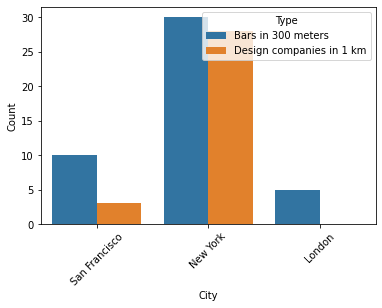

In [463]:
data = {"San Francisco": {"Bars in 300 meters": 10, "Design companies in 1 km": 3},
        "New York": {"Bars in 300 meters": 30, "Design companies in 1 km": 28},
        "London": {"Bars in 300 meters": 5, "Design companies in 1 km": 0}}

df = pd.DataFrame.from_dict(data, orient='index')
df = df.reset_index().melt(id_vars='index')
df.columns = ['City', 'Type', 'Count']

sns.barplot(x='City', y='Count', hue='Type', data=df)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.savefig("Images/Step2.png")
plt.show()

In [449]:
url = f"https://api.foursquare.com/v3/places/search?ll={lat1}%2C{lon1}&radius=1000&categories=11030&limit=50"

headers = {
    "accept": "application/json",
    "Authorization": (token)
}

response = requests.get(url, headers=headers)
dessign=response.json()
num_dessign = len(dessign['results'])
num_dessign

3

In [419]:
def distances (lat,lon):
    headers = {
    "accept": "application/json",
    "Authorization": (token)
    }
    #count bars

    #url = "https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&radius=500&categories=13003&limit=50"
    #response=requests.get(url, headers=headers).json()
    #bars=len(response['results'][0])

    #metro distance
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19046%2C19042&limit=1"
    response = requests.get(url, headers=headers)
    metro=response.json()["results"][0]
    metro=metro["distance"]
    #train distance
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19047%2C19050&limit=1"
    response = requests.get(url, headers=headers)
    rail=response.json()["results"][0]
    rail=rail["distance"]
    #airport distance
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19031&limit=1"
    response = requests.get(url, headers=headers)
    plane=response.json()["results"][0]
    plane=plane["distance"]
    #count design
    #url = "https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&radius=1000&categories=11030&limit=50"
    #response=requests.get(url, headers=headers).json()
    #design=len(response['results'][0])
    #school distance
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=12057&limit=1"
    response = requests.get(url, headers=headers)
    school=response.json()["results"][0]
    school=school["distance"]
    #kindergarten distance
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=12056&limit=1"
    response = requests.get(url, headers=headers)
    kids=response.json()["results"][0]
    kids=kids["distance"]
    #starbucks distance
    url = f"https://api.foursquare.com/v3/places/search?query=Starbucks&near={lat}%2C{lon}&limit=1"
    response = requests.get(url, headers=headers)
    coffee=response.json()["results"][0]
    coffee=coffee["distance"]
    #vegan restaurants
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=13377&limit=1"
    response = requests.get(url, headers=headers)
    vegan=response.json()["results"][0]
    vegan=vegan["distance"]
    #basket stadium
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=18006&limit=1"
    response = requests.get(url, headers=headers)
    basket=response.json()["results"][0]
    basket=basket["distance"]
    return {"Metro/Bus":metro,"Train/Tram": rail,"Airport": plane, "School":school, "Kindergarten":kids, "Starbucks":coffee, "Vegan":vegan, "Stadium":basket}

In [420]:
sfdistance=distances(lat1,lon1)
sfdistance

{'Metro/Bus': 668,
 'Train/Tram': 1210,
 'Airport': 18435,
 'School': 3861,
 'Kindergarten': 2032,
 'Starbucks': 579,
 'Vegan': 616,
 'Stadium': 1283}

In [421]:
nydistance=distances(lat2,lon2)
nydistance

{'Metro/Bus': 500,
 'Train/Tram': 1576,
 'Airport': 1652,
 'School': 4123,
 'Kindergarten': 3557,
 'Starbucks': 1288,
 'Vegan': 96,
 'Stadium': 1100}

In [422]:
londistance=distances(lat3,lon3)
londistance

{'Metro/Bus': 2062,
 'Train/Tram': 2185,
 'Airport': 22521,
 'School': 6651,
 'Kindergarten': 5384,
 'Starbucks': 916,
 'Vegan': 574,
 'Stadium': 1192}

In [474]:
data = {'San Francisco': sfdistance, 'New York': nydistance, 'London': londistance}
df = pd.DataFrame(data)
df = df.transpose()
df.index.name = 'City'
df.columns.name = 'Distance'
df

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium
City,,,,,,,,
San Francisco,668,1210,18435,3861,2032,579,616,1283
New York,500,1576,1652,4123,3557,1288,96,1100
London,2062,2185,22521,6651,5384,916,574,1192


In [424]:
df2=df.copy()

In [426]:
df2["People"]=(df2["Metro/Bus"]/77 + df2["Train/Tram"]/77 + df2["Airport"]/20 + df2["School"]/(0.3*77) + df2["Kindergarten"]/(0.3*77) + df2["Starbucks"]/10 + df2["Vegan"] + df2["Stadium"])
df2

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People
City,,,,,,,,,
San Francisco,668,1210,18435,3861,2032,579,616,1283,3158.147835
New York,500,1576,1652,4123,3557,1288,96,1100,1766.828571
London,2062,2185,22521,6651,5384,916,574,1192,3559.801515


In [485]:
df2["Heriarchy"]=(df2["Metro/Bus"] + df2["Train/Tram"] + df2["Airport"]*3 + df2["School"] + df2["Kindergarten"] + df2["Starbucks"]*2 + df2["Vegan"] + df2["Stadium"]*4)
df2

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People,Heriarchy,Importance,Combo
City,,,,,,,,,,,,
San Francisco,668,1210,18435,3861,2032,579,616,1283,3158.147835,69982,12027.9,4799.951429
New York,500,1576,1652,4123,3557,1288,96,1100,1766.828571,21784,5874.6,3101.060087
London,2062,2185,22521,6651,5384,916,574,1192,3559.801515,91019,16497.3,4946.016364


In [486]:
df2["Importance"]=(df2["Metro/Bus"]*0.1 + df2["Train/Tram"]*0.2 + df2["Airport"]*0.4 + df2["School"]*0.5 + df2["Kindergarten"]*0.3 + df2["Starbucks"]*0.6 + df2["Vegan"]*0.7 + df2["Stadium"]*0.8)
df2

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People,Heriarchy,Importance,Combo
City,,,,,,,,,,,,
San Francisco,668,1210,18435,3861,2032,579,616,1283,3158.147835,69982,12027.9,4799.951429
New York,500,1576,1652,4123,3557,1288,96,1100,1766.828571,21784,5874.6,3101.060087
London,2062,2185,22521,6651,5384,916,574,1192,3559.801515,91019,16497.3,4946.016364


In [487]:
df2["Combo"]=(df2["Metro/Bus"]/77*0.1 + df2["Train/Tram"]/77*0.2 + df2["Airport"]/20*3*0.4 + df2["School"]/(0.3*77)*0.5 + df2["Kindergarten"]/(0.3*77)*0.3 + df2["Starbucks"]/10*2*0.6 + df2["Vegan"]*0.7 + df2["Stadium"]*4*0.8)
df2

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People,Heriarchy,Importance,Combo
City,,,,,,,,,,,,
San Francisco,668,1210,18435,3861,2032,579,616,1283,3158.147835,69982,12027.9,5826.351429
New York,500,1576,1652,4123,3557,1288,96,1100,1766.828571,21784,5874.6,3981.060087
London,2062,2185,22521,6651,5384,916,574,1192,3559.801515,91019,16497.3,5899.616364


In [431]:
df3 = pd.DataFrame(columns=df.columns)

# Loop over each row and assign the rank to each column
for i, row in df.iterrows():
    row_new = []
    for j, value in row.iteritems():
        if value == df[j].max():
            row_new.append(3)
        elif value == df[j].min():
            row_new.append(1)
        else:
            row_new.append(2)
    df3.loc[i] = row_new

df3

C:\Users\gqsal\AppData\Local\Temp\ipykernel_20504\3111373745.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, value in row.iteritems():
C:\Users\gqsal\AppData\Local\Temp\ipykernel_20504\3111373745.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, value in row.iteritems():
C:\Users\gqsal\AppData\Local\Temp\ipykernel_20504\3111373745.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, value in row.iteritems():


Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium
San Francisco,2,1,2,1,1,1,3,3
New York,1,2,1,2,2,3,1,1
London,3,3,3,3,3,2,2,2


In [436]:
df3["People"]=(df3["Metro/Bus"]/77 + df3["Train/Tram"]/77 + df3["Airport"]/20 + df3["School"]/(0.3*77) + df3["Kindergarten"]/(0.3*77) + df3["Starbucks"]/10 + df3["Vegan"] + df3["Stadium"])
df3

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People
San Francisco,2,1,2,1,1,1,3,3,6.325541
New York,1,2,1,2,2,3,1,1,2.562121
London,3,3,3,3,3,2,2,2,4.687662


In [438]:
df3["Heriarchy"]=(df3["Metro/Bus"] + df3["Train/Tram"] + df3["Airport"]*3 + df3["School"] + df3["Kindergarten"] + df3["Starbucks"]*2 + df3["Vegan"] + df3["Stadium"]*3)
df3

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People,Heriarchy
San Francisco,2,1,2,1,1,1,3,3,6.325541,25
New York,1,2,1,2,2,3,1,1,2.562121,20
London,3,3,3,3,3,2,2,2,4.687662,33


In [441]:
df3["Importance"]=(df3["Metro/Bus"]*0.1 + df3["Train/Tram"]*0.2 + df3["Airport"]*0.4 + df3["School"]*0.5 + df3["Kindergarten"]*0.3 + df3["Starbucks"]*0.6 + df3["Vegan"]*0.7 + df3["Stadium"]*0.8)
df3

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People,Heriarchy,Importance
San Francisco,2,1,2,1,1,1,3,3,6.325541,25,7.1
New York,1,2,1,2,2,3,1,1,2.562121,20,5.8
London,3,3,3,3,3,2,2,2,4.687662,33,8.7


In [443]:
df3["Combo"]=((df3["Metro/Bus"]/77)*0.1 + (df3["Train/Tram"]/77)*0.2 + (df3["Airport"]/20)*3*0.4 + (df3["School"]/(0.3*77))*0.5 + (df3["Kindergarten"]/(0.3*77))*0.3 + (df3["Starbucks"]/10)*2*0.6 + df3["Vegan"]*0.7 + df3["Stadium"]*3*0.8)
df3

Distance,Metro/Bus,Train/Tram,Airport,School,Kindergarten,Starbucks,Vegan,Stadium,People,Heriarchy,Importance,Combo
San Francisco,2,1,2,1,1,1,3,3,6.325541,25,7.1,9.579827
New York,1,2,1,2,2,3,1,1,2.562121,20,5.8,3.595758
London,3,3,3,3,3,2,2,2,4.687662,33,8.7,6.735584


In [488]:
df4=df2[["People", "Heriarchy", "Importance", "Combo"]]
df4

Distance,People,Heriarchy,Importance,Combo
City,,,,
San Francisco,3158.147835,69982,12027.9,5826.351429
New York,1766.828571,21784,5874.6,3981.060087
London,3559.801515,91019,16497.3,5899.616364


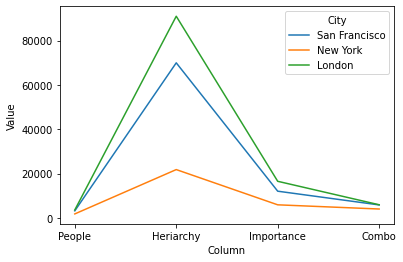

In [492]:
df4_melted = df4.reset_index().melt(id_vars='City', var_name='Column', value_name='Value')

# Create the line plot
sns.lineplot(x='Column', y='Value', hue='City', data=df4_melted)

plt.savefig("Images/Total.png")
plt.show()

In [477]:
df5=df3[["People", "Heriarchy", "Importance", "Combo"]]
df5

Distance,People,Heriarchy,Importance,Combo
San Francisco,6.325541,25,7.1,9.579827
New York,2.562121,20,5.8,3.595758
London,4.687662,33,8.7,6.735584


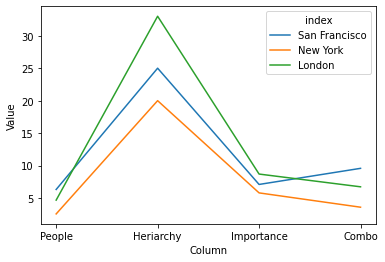

In [493]:
df5_melted = df5.reset_index().melt(id_vars='index', var_name='Column', value_name='Value')

# Create the line plot
sns.lineplot(x='Column', y='Value', hue='index', data=df5_melted)

plt.savefig("Images/Partial.png")
plt.show()

In [ ]:
def Mapa(lat, lon):
    origen = Map(location=[lat, lon], zoom_start=13)
#Option of setting the company    
    icon1 = Icon(
        color="lightred",
        prefix="fa",
        icon="gamepad",
        icon_color="white"
    )

    game = Marker(
        location=[lat, lon],
        tooltip="Game",
        icon=icon1
    )
    game.add_to(origen)

#Starbucks  
    url = f"https://api.foursquare.com/v3/places/search?query=Starbucks&near={lat}%2C{lon}&limit=1"

    headers = {
        "accept": "application/json",
        "Authorization": (token)
    }

    response = requests.get(url, headers=headers)
    coffe = response.json()["results"][0]
    loncoffe = coffe["geocodes"]["main"]["longitude"]
    latcoffe = coffe["geocodes"]["main"]["latitude"]
    
    icon2 = Icon(
        color="white",
        prefix="fa",
        icon="coffee",
        icon_color="green"
    )

    coffee = Marker(
        location=[latcoffe, loncoffe],
        tooltip="coffee",
        icon=icon2
    )
    coffee.add_to(origen)
#airports category:19031
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19031&limit=1"

    response = requests.get(url, headers=headers)
    air = response.json()["results"][0]
    lonair = air["geocodes"]["main"]["longitude"]
    latair = air["geocodes"]["main"]["latitude"]
    
    icon3 = Icon(
        color="lightblue",
        prefix="fa",
        icon="plane",
        icon_color="grey"
    )

    plane = Marker(
        location=[latair, lonair],
        tooltip="Airport",
        icon=icon3
    )
    plane.add_to(origen)
#Metros and buses
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19046%2C19042&limit=1"

    response = requests.get(url, headers=headers)
    metro = response.json()["results"][0]
    lonmetro = metro["geocodes"]["main"]["longitude"]
    latmetro = metro["geocodes"]["main"]["latitude"]
    
    icon4 = Icon(
        color="lightblue",
        prefix="fa",
        icon="bus",
        icon_color="grey"
    )

    metro = Marker(
        location=[latmetro, lonmetro],
        tooltip="Bus/Metro Station",
        icon=icon4
    )
    metro.add_to(origen)


#Rail and Tram
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=19047%2C19050&limit=1"

    response = requests.get(url, headers=headers)
    rail = response.json()["results"][0]
    lonrail = rail["geocodes"]["main"]["longitude"]
    latrail = rail["geocodes"]["main"]["latitude"]
    
    icon5 = Icon(
        color="lightblue",
        prefix="fa",
        icon="train",
        icon_color="grey"
    )

    rail = Marker(
        location=[latrail, lonrail],
        tooltip="Train/Tram Station",
        icon=icon5
    )
    rail.add_to(origen)

#Schools category:12057
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=12057&limit=1"

    response = requests.get(url, headers=headers)
    school = response.json()["results"][0]
    lonschool = school["geocodes"]["main"]["longitude"]
    latschool = school["geocodes"]["main"]["latitude"]
    
    icon6 = Icon(
        color="orange",
        prefix="fa",
        icon="graduation-cap",
        icon_color="black"
    )

    school = Marker(
        location=[latschool, lonschool],
        tooltip="School",
        icon=icon6
    )
    school.add_to(origen)

#Kindergarten Schools category:12056
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=12056&limit=1"

    response = requests.get(url, headers=headers)
    kinder = response.json()["results"][0]
    lonkinder = kinder["geocodes"]["main"]["longitude"]
    latkinder = kinder["geocodes"]["main"]["latitude"]
    
    icon7 = Icon(
        color="orange",
        prefix="fa",
        icon="child",
        icon_color="black"
    )

    kinder = Marker(
        location=[latkinder, lonkinder],
        tooltip="KinderGarten",
        icon=icon7
    )
    kinder.add_to(origen)
#Vegan
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=13377&limit=1"

    response = requests.get(url, headers=headers)
    vegan = response.json()["results"][0]
    lonvegan = vegan["geocodes"]["main"]["longitude"]
    latvegan = vegan["geocodes"]["main"]["latitude"]
    
    icon8 = Icon(
        color="green",
        prefix="fa",
        icon="cutlery",
        icon_color="white"
    )

    vegan = Marker(
        location=[latvegan, lonvegan],
        tooltip="Vegan",
        icon=icon8
    )
    vegan.add_to(origen)


#Court
    url = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&categories=18006&limit=1"

    response = requests.get(url, headers=headers)
    basket = response.json()["results"][0]
    lonbasket = basket["geocodes"]["main"]["longitude"]
    latbasket = basket["geocodes"]["main"]["latitude"]
    
    icon9 = Icon(
        color="white",
        prefix="fa",
        icon="globe",
        icon_color="orange"
    )

    basket = Marker(
        location=[latbasket, lonbasket],
        tooltip="Stadium",
        icon=icon9
    )
    basket.add_to(origen)
    return origen

In [494]:
Mapa(41.3995235,2.1384912)

In [344]:
distances(41.3995235,2.1384912)

{'Closest Metro/Bus': 1224,
 'Closest Train/Tram': 4290,
 'Closest Airport': 12662,
 'Closest School': 1707,
 'Closest Kindergarten': 704,
 'Closest Starbucks': 1365,
 'Closest Vegan Restaurant': 1830,
 'Closest Basketball Stadium': 16211}